In [1]:
# Part 1 - Building the CNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.models import model_from_json
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
batch_size = 32

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        'DataSet',  # This is the source directory for training images
        target_size=(200, 200),  # All images will be resized to 200 x 200
        batch_size=batch_size,
        # Specify the classes explicitly
        classes = ['Apple___Black_rot','Apple___healthy','Corn_(maize)___healthy','Corn_(maize)___Northern_Leaf_Blight',
'Peach___Bacterial_spot','Peach___healthy','Pepper_bell___Bacterial_spot','Pepper_bell___healthy','Potato___Early_blight',
'Potato___healthy','Potato___Late_blight','Tomato___Bacterial_spot','Tomato___Late_blight',
'Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot'],
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

Found 16770 images belonging to 15 classes.


In [4]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 200x 200 with 3 bytes color
    # The first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a dense layer
    tf.keras.layers.Flatten(),
    # 128 neuron in the fully-connected layer
    tf.keras.layers.Dense(128, activation='relu'),
    # 5 output neurons for 5 classes with the softmax activation
    tf.keras.layers.Dense(15, activation='softmax')
])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 64)       0

In [6]:
from tensorflow.keras.optimizers import RMSprop
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

total_sample=train_generator.n

n_epochs = 10

history = model.fit_generator(
        train_generator,
        steps_per_epoch=int(total_sample/batch_size),
        epochs=n_epochs,
        verbose=1)

Epoch 1/10
524/524 [==============================] - 585s 1s/step - loss: 1.5749 - accuracy: 0.4858
Epoch 2/10
524/524 [==============================] - 494s 943ms/step - loss: 0.7359 - accuracy: 0.7556
Epoch 3/10
524/524 [==============================] - 476s 908ms/step - loss: 0.4699 - accuracy: 0.8398
Epoch 4/10
524/524 [==============================] - 467s 891ms/step - loss: 0.3500 - accuracy: 0.8825
Epoch 5/10
524/524 [==============================] - 484s 924ms/step - loss: 0.2696 - accuracy: 0.9103
Epoch 6/10
524/524 [==============================] - 495s 945ms/step - loss: 0.2125 - accuracy: 0.9300
Epoch 7/10
524/524 [==============================] - 481s 918ms/step - loss: 0.1750 - accuracy: 0.9425
Epoch 8/10
524/524 [==============================] - 475s 906ms/step - loss: 0.1511 - accuracy: 0.9505
Epoch 9/10
524/524 [==============================] - 492s 940ms/step - loss: 0.1305 - accuracy: 0.9586
Epoch 10/10
524/524 [==============================] - 518s 989ms/s

In [7]:
model.save('model.h5')

In [8]:
acc = history.history['accuracy']

loss = history.history['loss']

epochs = range(1, len(acc) + 1)

<Figure size 432x288 with 0 Axes>

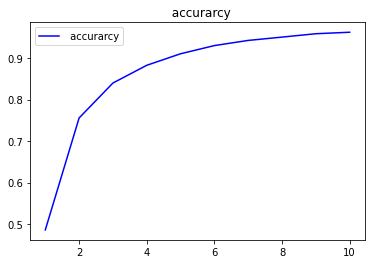

<Figure size 432x288 with 0 Axes>

In [9]:
# Train and validation accuracy
plt.plot(epochs, acc, 'b', label=' accurarcy')

plt.title('  accurarcy')
plt.legend()

plt.figure()

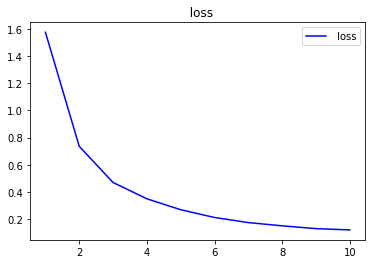

In [10]:
# Train and validation loss
plt.plot(epochs, loss, 'b', label=' loss')
plt.title('  loss')
plt.legend()
plt.show()